In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul  2 22:22:54 2023

@author: Shree
"""
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(90)
sigmoid = lambda x: 1 / (1 + np.exp(-x))

def generate_data(n_dims, n_points, std):
    global coefs
    # equation will be of the form a1x1 + a2x2 + a3x3 ... = 0 forming a hyperplane
    x = np.random.normal(0, std, (n_points, n_dims))
    coefs = np.random.normal(0, std, (n_dims, 1))
    
    # class will be decided based upon the distance and direction from the hyperplane 
    dists = x @ coefs
    y = np.random.binomial(1, sigmoid(dists))
        
    return x, y


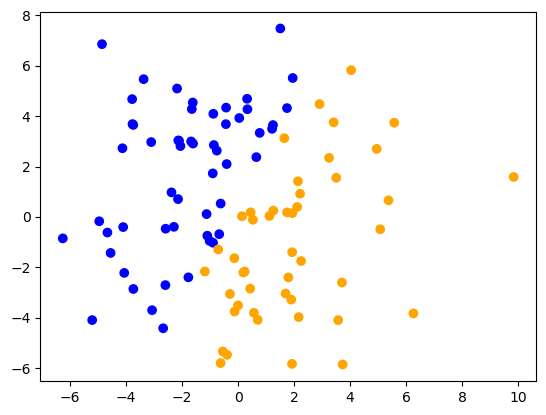

In [3]:
n_dims = 2
n_points = 100
std = 3
x, labels = generate_data(n_dims, n_points, std)

plt.scatter(x[:, 0], x[:, 1], c=["orange" if x else "blue" for x in labels])


In [4]:

# calculate dLoss/dWeights (reused from previous question)
def delta_at(x, y, weights, sigmoids):
    return x.T @ (sigmoids - y) / n_points

# calculate d2Loss/dWeights
def delta2_at(x, y, weights, sigmoids):
    # compute the outerproduct of each row vector in X with itself
    outer_product = np.einsum('ij,ik->ijk', x, x)
    return (outer_product * (sigmoids * (1-sigmoids))[:, None]).mean(0)

def newton_descent(x, y, weights, lr=0.01, iterations=1000):
    for i in range(iterations):
        # we calculate the sigmoid values outside since theyre reused in both functions
        sigmoids = sigmoid(x @ weights)
        weights -= lr * np.linalg.inv(delta2_at(x, y, weights, sigmoids)) @ \
                   delta_at(x, y, weights, sigmoids)
    return weights

def gradient_descent(x, y, weights, lr=0.1, iterations=100):
    for i in range(iterations):
        sigmoids = sigmoid(x @ weights)
        weights -= lr * delta_at(x, y, weights, sigmoids)
    return weights

def predict(x, weights):
    return sigmoid(x @ weights)


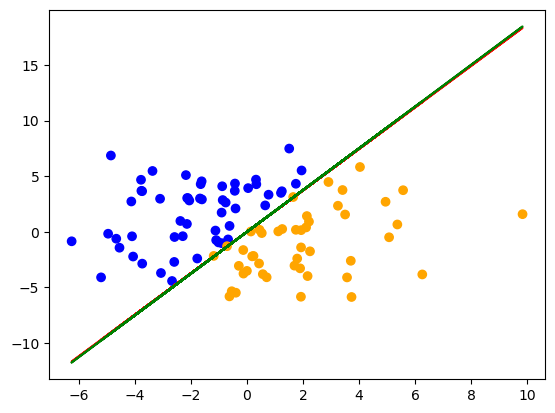

In [5]:

initial_weights = np.random.normal(0, 1, (n_dims, 1))
trained_weights = newton_descent(x, labels, initial_weights)

plt.scatter(x[:, 0], x[:, 1], c=["orange" if x else "blue" for x in labels])

plt.plot(x[:, 0], -trained_weights[0] * x[:, 0] / trained_weights[1], c='red')
plt.plot(x[:, 0], -coefs[0] * x[:, 0] / coefs[1], c='green')
plt.show()

# COMPARE COMPLEXITY WRT NUMBER OF POINTS


In [7]:
from time import time
from tqdm.notebook import tqdm

n_dims = 2
std = 3
initial_weights = np.random.normal(0, 1, (n_dims, 1))

gradient_times = []
for n_points in tqdm(range(100, 10_000, 100)):
    x, labels = generate_data(n_dims, n_points, std)
    t = time()
    for i in range(10):
        trained_weights = gradient_descent(x, labels, initial_weights, 0.01, 1000)
    gradient_times.append(time()-t)
    

  0%|          | 0/99 [00:00<?, ?it/s]

In [10]:
newton_times = []
for n_points in tqdm(range(100, 10_000, 100)):
    x, labels = generate_data(n_dims, n_points, std)
    t = time()
    for i in range(10):
        trained_weights = newton_descent(x, labels, initial_weights, 0.01, 1000)
    newton_times.append(time()-t)

  0%|          | 0/99 [00:00<?, ?it/s]

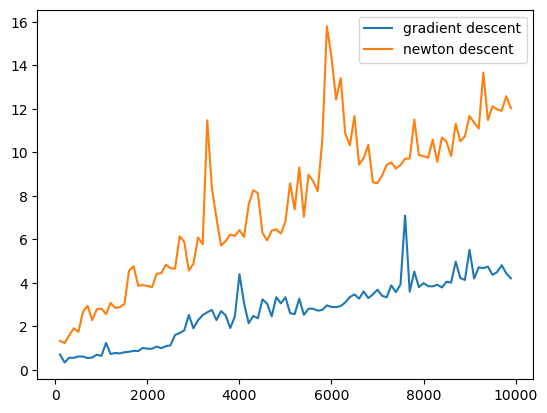

In [12]:
plt.plot(range(100, 10_000, 100), gradient_times, label='gradient descent')
plt.plot(range(100, 10_000, 100), newton_times, label='newton descent')
plt.legend()
plt.show()

Both methods show linear complexity wrt the number of points that are to be fitted.
Newton method seems to be ~3x slower due to higher computational cost

# COMPARE COMPLEXITY WRT NUMBER OF DIMENSIONS

In [ ]:
n_points = 500
std = 3

gradient_times = []
newton_times = []

for n_dims in tqdm(range(2, 202, 10)):
    x, labels = generate_data(n_dims, n_points, std)
    initial_weights = np.random.normal(0, 1, (n_dims, 1))
    
    t = time()
    for i in range(10):
        gradient_descent(x, labels, initial_weights, 0.01, 200)
    gradient_times.append(time()-t)
    
    t = time()
    for i in range(10):
        newton_descent(x, labels, initial_weights, 0.01, 200)
    newton_times.append(time()-t)

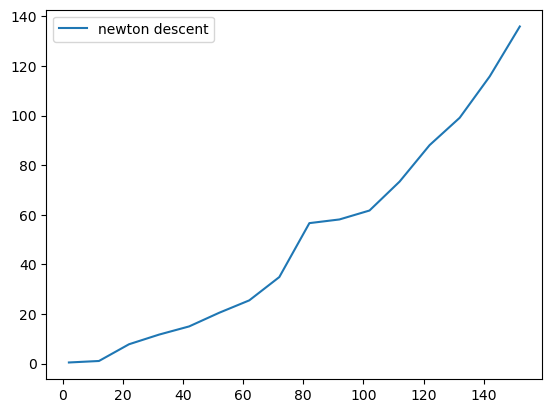

In [24]:
plt.plot(range(2, 162, 10), newton_times, label='newton descent')
plt.legend()
plt.show()

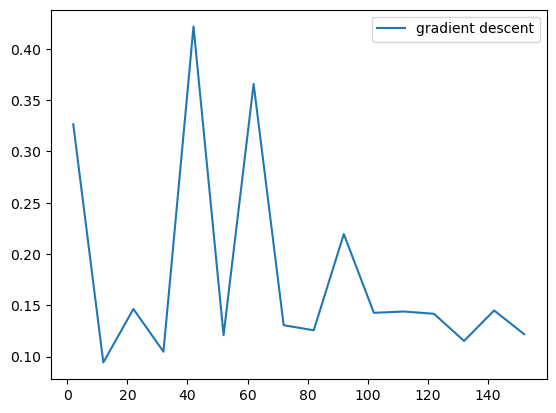

In [23]:
plt.plot(range(2, 162, 10), gradient_times[:-1], label='gradient descent')
plt.legend()
plt.show()

There's too much noise in the gradient descent case hence its difficult to draw an inference of the trend for the time complexity wrt number of dimensions of the feature space
The trend for newton descent is quadratic in nature and the time taken is multifold compared to gradient descent

# COMPARE COMPLEXITY (TIME TAKEN FOR CONVERGENCE)